In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

https://archive.ics.uci.edu/ml/datasets.php

In [109]:
df = pd.read_csv("train.csv")

In [6]:
df["LotArea"].sample(10)

1183    10800
432      1920
472      3675
583     13500
1302    10120
1011     9825
1004     3182
1343     7558
630      9000
1289    11065
Name: LotArea, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
df1 = df[["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd","SalePrice"]]

In [14]:
df1.sample(20)

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
702,12438,2006,1264,1312,2,4,10,361919
774,14226,2006,1973,0,2,3,9,395000
1279,7500,1920,698,430,1,2,6,68400
28,16321,1957,1600,0,1,2,6,207500
841,10440,1904,958,581,2,3,8,157500
733,10000,1961,1144,0,1,3,6,131400
1304,3363,2004,976,732,2,3,7,130000
397,7590,1962,876,936,2,4,8,169500
1450,9000,1974,896,896,2,4,8,136000
247,11310,1954,1375,0,1,2,5,140000


In [71]:
numbers = [f for f in df.columns if df.dtypes[f] != 'object']

In [72]:
list_nums = ",  ".join(numbers)
list_nums

'Id,  MSSubClass,  LotFrontage,  LotArea,  OverallQual,  OverallCond,  YearBuilt,  YearRemodAdd,  MasVnrArea,  BsmtFinSF1,  BsmtFinSF2,  BsmtUnfSF,  TotalBsmtSF,  1stFlrSF,  2ndFlrSF,  LowQualFinSF,  GrLivArea,  BsmtFullBath,  BsmtHalfBath,  FullBath,  HalfBath,  BedroomAbvGr,  KitchenAbvGr,  TotRmsAbvGrd,  Fireplaces,  GarageYrBlt,  GarageCars,  GarageArea,  WoodDeckSF,  OpenPorchSF,  EnclosedPorch,  3SsnPorch,  ScreenPorch,  PoolArea,  MiscVal,  MoSold,  YrSold,  SalePrice'

In [73]:
len(list_nums)

478

In [74]:
objs = [f for f in df.columns if df.dtypes[f] == 'object' ]

In [75]:
list_obj = ",  ".join(objs)
list_obj

'MSZoning,  Street,  Alley,  LotShape,  LandContour,  Utilities,  LotConfig,  LandSlope,  Neighborhood,  Condition1,  Condition2,  BldgType,  HouseStyle,  RoofStyle,  RoofMatl,  Exterior1st,  Exterior2nd,  MasVnrType,  ExterQual,  ExterCond,  Foundation,  BsmtQual,  BsmtCond,  BsmtExposure,  BsmtFinType1,  BsmtFinType2,  Heating,  HeatingQC,  CentralAir,  Electrical,  KitchenQual,  Functional,  FireplaceQu,  GarageType,  GarageFinish,  GarageQual,  GarageCond,  PavedDrive,  PoolQC,  Fence,  MiscFeature,  SaleType,  SaleCondition'

In [76]:
i = 1
for obj in numbers:
    if len(df[obj].unique())<200:
        list_obj += ", "+ obj
        objs.append(obj)
        list_nums = list_nums.replace(obj," ")
        numbers.remove(obj)
list_obj

'MSZoning,  Street,  Alley,  LotShape,  LandContour,  Utilities,  LotConfig,  LandSlope,  Neighborhood,  Condition1,  Condition2,  BldgType,  HouseStyle,  RoofStyle,  RoofMatl,  Exterior1st,  Exterior2nd,  MasVnrType,  ExterQual,  ExterCond,  Foundation,  BsmtQual,  BsmtCond,  BsmtExposure,  BsmtFinType1,  BsmtFinType2,  Heating,  HeatingQC,  CentralAir,  Electrical,  KitchenQual,  Functional,  FireplaceQu,  GarageType,  GarageFinish,  GarageQual,  GarageCond,  PavedDrive,  PoolQC,  Fence,  MiscFeature,  SaleType,  SaleCondition, MSSubClass, OverallQual, YearBuilt, BsmtFinSF2, LowQualFinSF, BsmtFullBath, FullBath, BedroomAbvGr, TotRmsAbvGrd, GarageYrBlt, EnclosedPorch, ScreenPorch, MiscVal, YrSold'

In [77]:
len(list_nums)

348

In [79]:
for obj in objs:
    print(obj,len(df[obj].unique()),df[obj].unique())

MSZoning 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street 2 ['Pave' 'Grvl']
Alley 3 [nan 'Grvl' 'Pave']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 4 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 2 ['AllPub' 'NoSeWa']
LotConfig 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
E

In [81]:
df["LotArea"].describe(include ="all")

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [83]:
LotArea_median = df.LotArea.median()
LotArea_median

9478.5

In [84]:
LotArea_mode = df.LotArea.mode()
LotArea_mode

0    7200
dtype: int64

In [86]:
LotArea_range = df.LotArea.ptp()
LotArea_range

213945

In [87]:
Q1 = np.percentile(df.LotArea,25)
Q1

7553.5

In [88]:
Q3 = np.percentile(df.LotArea,75)
Q3

11601.5

In [89]:
LotArea_iqr = scipy.stats.iqr(df.LotArea)
LotArea_iqr

4048.0

In [90]:
LotArea_var = df.LotArea.var()
LotArea_var

99625649.65034176

In [91]:
LotArea_std = df.LotArea.std()
LotArea_std

9981.26493237915

In [93]:
LotArea_skew = df.LotArea.skew()
LotArea_skew

12.207687851233496

In [95]:
LotArea_kur = df.LotArea.kurtosis()
LotArea_kur

203.24327101886033

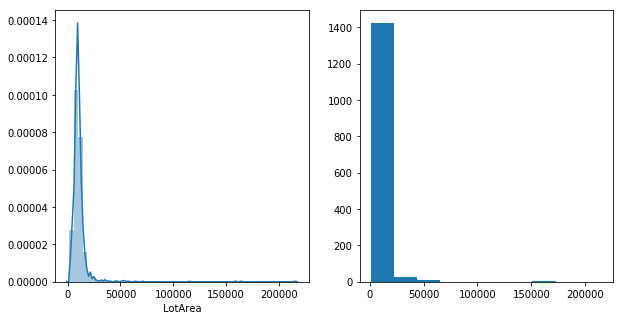

In [97]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df.LotArea)
plt.subplot(1,2,2)
plt.hist(df.LotArea)
plt.show()

In [98]:
type(df.LotArea)

pandas.core.series.Series

In [107]:
def phan_tich_don_bien(column):
    dic = {}
    dic["median"]=column.median()
    dic["mode"] = column.mode()[0]
    dic["range"] = column.ptp()
    dic["25%"] = np.percentile(column,25)
    dic["75%"] = np.percentile(column,75)
    dic["IQR"] = scipy.stats.iqr(column)
    dic["variance"] = column.var()
    dic["std"] = column.std()
    dic["skew"] = column.skew()
    dic["kurtosis"] = scipy.stats.kurtosis(column)
    print(dic)
    return dic


In [108]:
LotArea_statistic_info = phan_tich_don_bien(df.LotArea)

{'median': 9478.5, 'mode': 7200, 'range': 213945, '25%': 7553.5, '75%': 11601.5, 'IQR': 4048.0, 'variance': 99625649.65034176, 'std': 9981.26493237915, 'skew': 12.207687851233496, 'kurtosis': 202.5437927513529}


In [102]:
LotArea_statistic_info

{'median': 9478.5, 'mode': 0    7200
 dtype: int64}

In [111]:
def plot_1_column(column):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.distplot(column)
    plt.subplot(1,2,2)
    plt.hist(column)
    plt.show()

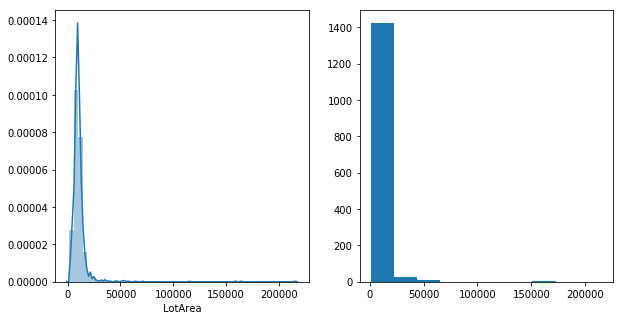

In [112]:
plot_1_column(df.LotArea)

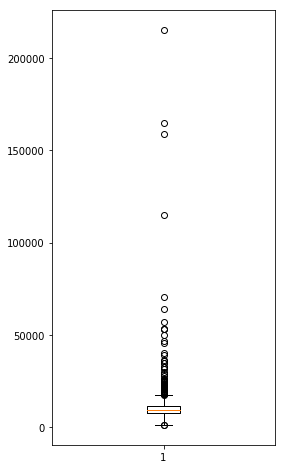

In [113]:
plt.figure(figsize = (4,8))
plt.boxplot(df.LotArea)
plt.show()

In [115]:
n_O_upper = df[df.LotArea > (Q3 +1.5*LotArea_iqr)].shape[0]
n_O_upper

67

In [117]:
n_O_lower = df[df.LotArea < (Q1 -1.5*LotArea_iqr)].shape[0]
n_O_lower

2

In [118]:
outliers_per= (n_O_upper+n_O_lower)/df.shape[0]
outliers_per

0.04726027397260274

In [121]:
FullBath_count = df.groupby("FullBath").Id.count()
FullBath_count

FullBath
0      9
1    650
2    768
3     33
Name: Id, dtype: int64

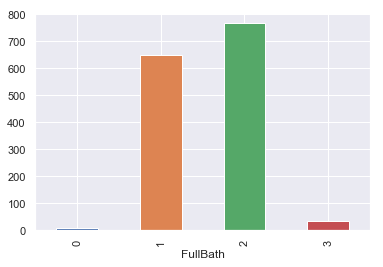

In [123]:
sns.set()
FullBath_count.plot.bar()

In [125]:
BedroomAbvGr_count = df.groupby("BedroomAbvGr").Id.count()
BedroomAbvGr_count

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: Id, dtype: int64

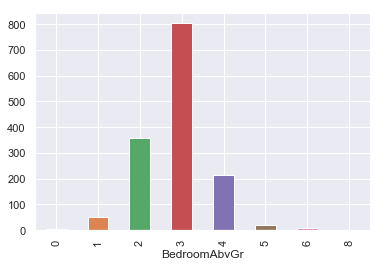

In [126]:
sns.set()
BedroomAbvGr_count.plot.bar()

In [128]:
TotRmsAbvGrd_count = df.groupby("TotRmsAbvGrd").Id.count()
TotRmsAbvGrd_count

TotRmsAbvGrd
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: Id, dtype: int64

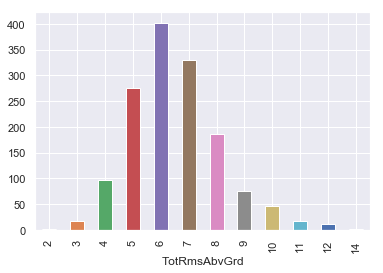

In [129]:
sns.set()
TotRmsAbvGrd_count.plot.bar()

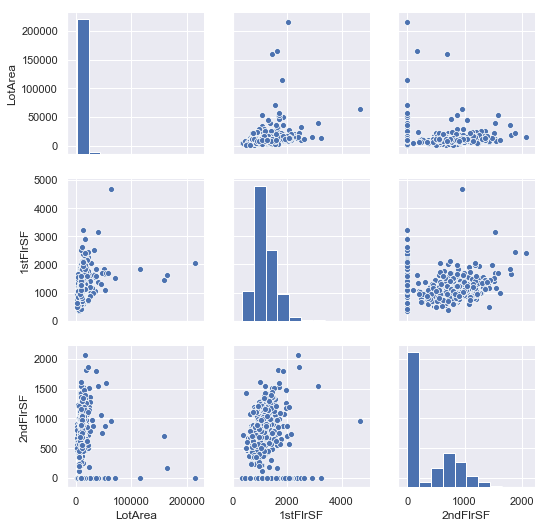

In [131]:

sns.pairplot(df[["LotArea","1stFlrSF","2ndFlrSF"]])

In [132]:
df[["LotArea","1stFlrSF","2ndFlrSF"]].corr()

,LotArea,1stFlrSF,2ndFlrSF
LotArea,1.000000,0.299475,0.050986
1stFlrSF,0.299475,1.000000,-0.202646
2ndFlrSF,0.050986,-0.202646,1.000000


In [133]:
table_FB = pd.crosstab(df['FullBath'],df['BedroomAbvGr'])
table_FB

BedroomAbvGr,0,1,2,3,4,5,6,8
FullBath,,,,,,,,
0,5,2,2,0,0,0,0,0
1,1,42,213,352,37,5,0,0
2,0,6,143,443,156,12,7,1
3,0,0,0,9,20,4,0,0


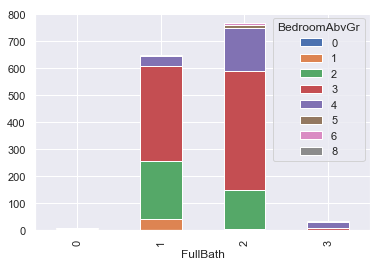

In [134]:
table_FB.plot(kind='bar',stacked = True)
plt.show()

In [136]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [137]:
stat, p, dof, expected = chi2_contingency(table_FB)
print("dof = ",dof)
print("p =",p)

dof =  21
p = 9.022959522651409e-177


In [139]:
prob = 0.05
critical = chi2.ppf(prob,dof)
print()

In [141]:
alpha = 1.0 - prob
print('significance = %.3f, p = %.3f' %(alpha,p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (accept H0)")

significance = 0.950, p = 0.000
Dependent (reject H0)


In [142]:
df_sub = df[["LotArea","FullBath"]]
df_sub.head()

,LotArea,FullBath
0,8450,2
1,9600,2
2,11250,2
3,9550,1
4,14260,2


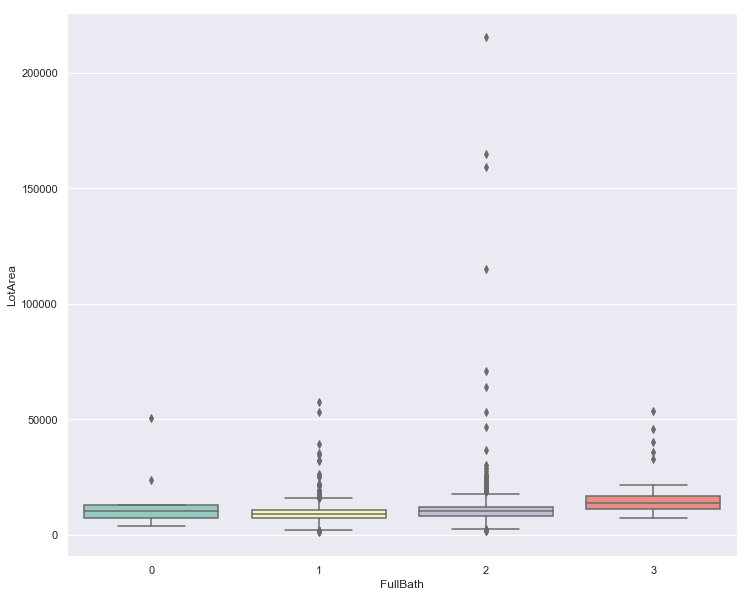

In [144]:
plt.figure(figsize=(12,10))
sns.boxplot(x="FullBath",y="LotArea",data=df_sub,palette="Set3")
plt.show()

In [145]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [146]:
model = ols('LotArea ~ C(FullBath)',data = df_sub).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(FullBath),3.332090e+09,3.0,11.386809,2.207543e-07
Residual,1.420217e+11,1456.0,NaN,NaN


In [148]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=df_sub["LotArea"],groups=df_sub["FullBath"],alpha = 0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
  0      1    -5695.6583 -14221.4451 2830.1286  False 
  0      2    -3587.0109  -12103.848 4929.8263  False 
  0      3    2477.0404   -7075.4392  12029.52  False 
  1      2    2108.6474    754.7975  3462.4974   True 
  1      3    8172.6987   3639.9003  12705.4971  True 
  2      3    6064.0513   1548.1091  10579.9935  True 
------------------------------------------------------


In [149]:
df_now = df[["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]]
df_now.isnull().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

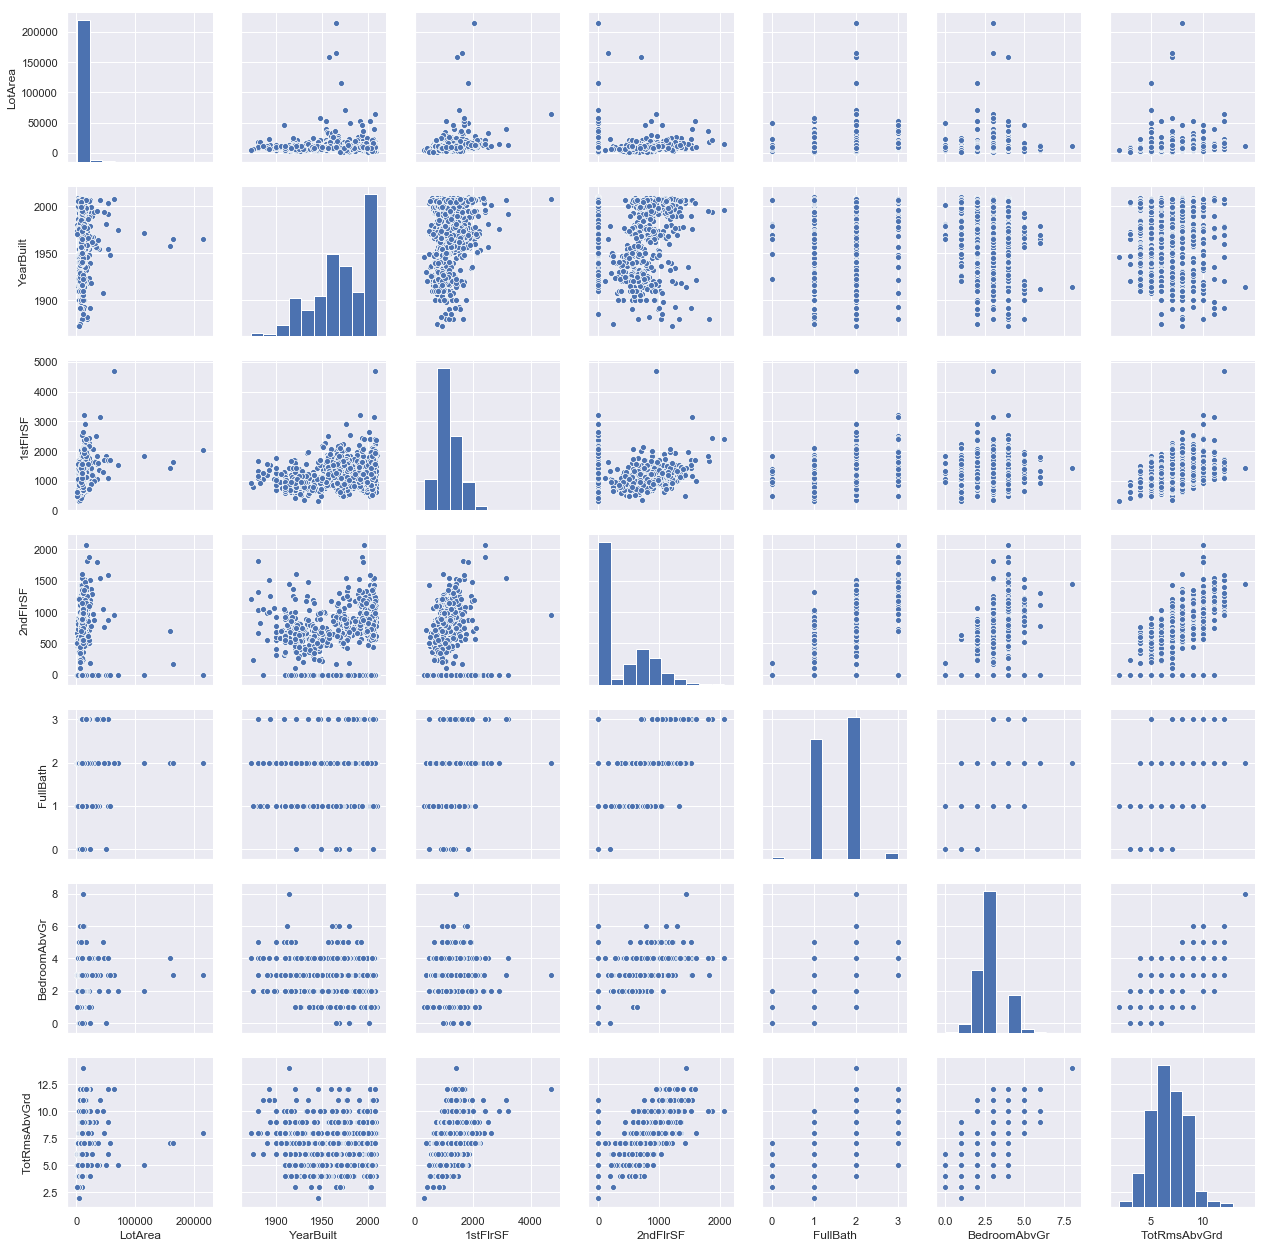

In [152]:
sns.pairplot(df_now)

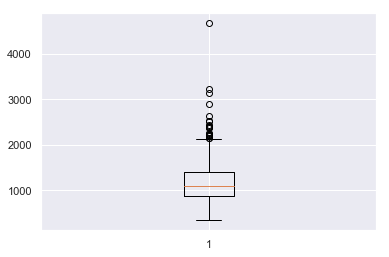

In [153]:
plt.boxplot(df['1stFlrSF'])
plt.show()

In [155]:
Q11 = np.percentile(df["1stFlrSF"],25)
Q11

882.0

In [156]:
Q31 = np.percentile(df["1stFlrSF"],75)
Q31

1391.25

In [ ]:
IQR1 = scipy.stats.iqr